In [ ]:
!pip install gdown

In [ ]:
!gdown 1B-zqnWqbRug3IJY1EG2A9XT2cQE2AoJN

Downloading...
From: https://drive.google.com/uc?id=1B-zqnWqbRug3IJY1EG2A9XT2cQE2AoJN
To: /content/Copy of FruitinAmazon.zip
100% 1.24M/1.24M [00:00<00:00, 14.2MB/s]


In [ ]:
!unzip "/content/Copy of FruitinAmazon.zip"

Archive:  /content/Copy of FruitinAmazon.zip
  inflating: FruitinAmazon/test/cupuacu/download (5).jpeg  
  inflating: FruitinAmazon/test/acai/images (2).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (3).jpeg  
  inflating: FruitinAmazon/test/acai/images (16).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (2).jpeg  
  inflating: FruitinAmazon/train/pupunha/images (1).jpeg  
  inflating: FruitinAmazon/test/cupuacu/download (2).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (1).jpeg  
  inflating: FruitinAmazon/train/acai/images (3).jpeg  
  inflating: FruitinAmazon/train/acai/images (4).jpeg  
  inflating: FruitinAmazon/test/graviola/download (1).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (11).jpeg  
  inflating: FruitinAmazon/test/pupunha/download (4).jpeg  
  inflating: FruitinAmazon/train/acai/images (11).jpeg  
  inflating: FruitinAmazon/test/tucuma/download (1).jpeg  
  inflating: FruitinAmazon/test/acai/images.jpeg  
  inflating: FruitinAmaz

In [ ]:
!pip install keras tensorflow

In [ ]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


Task 1

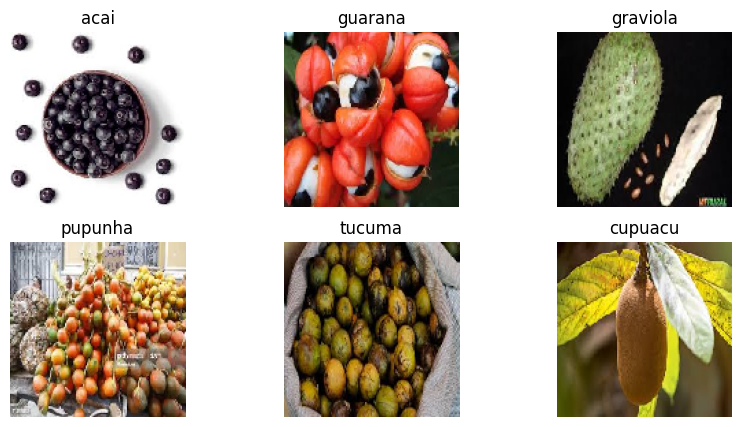

No corrupted images found.


In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
# Task 1: Load and Visualize Data
def load_and_visualize_images(train_dir):
    class_names = os.listdir(train_dir)
    selected_images = []

    for class_name in class_names:
        class_path = os.path.join(train_dir, class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            image_name = random.choice(os.listdir(class_path))
            image_path = os.path.join(class_path, image_name)
            selected_images.append((image_path, class_name))

    fig, axes = plt.subplots(2, len(selected_images)//2, figsize=(10, 5))
    axes = axes.flatten()
    for ax, (img_path, label) in zip(axes, selected_images):
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
        ax.imshow(img)
        ax.set_title(label)
        ax.axis('off')
    plt.show()

# Task 1.2: Check for Corrupted Images
def check_corrupted_images(train_dir):
    corrupted_images = []
    for class_name in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                try:
                    img = tf.keras.preprocessing.image.load_img(img_path)
                except (IOError, SyntaxError):
                    corrupted_images.append(img_path)
                    os.remove(img_path)
                    print(f"Removed corrupted image: {img_path}")

    if not corrupted_images:
        print("No corrupted images found.")

# Example Usage
train_dir = "FruitinAmazon/train"
load_and_visualize_images(train_dir)
check_corrupted_images(train_dir)


Task 2

In [ ]:
import tensorflow as tf

def load_and_preprocess_data(train_dir, img_height, img_width, batch_size, validation_split):
    rescale = tf.keras.layers.Rescaling(1./255)

    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        image_size=(img_height, img_width),
        interpolation='nearest',
        batch_size=batch_size,
        shuffle=True,
        validation_split=validation_split,
        subset='training',
        seed=123
    )

    train_ds = train_ds.map(lambda x, y: (rescale(x), y))

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        image_size=(img_height, img_width),
        interpolation='nearest',
        batch_size=batch_size,
        shuffle=False,
        validation_split=validation_split,
        subset='validation',
        seed=123
    )

    val_ds = val_ds.map(lambda x, y: (rescale(x), y))

    return train_ds, val_ds

# Example usage
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2
train_ds, val_ds = load_and_preprocess_data(train_dir, img_height, img_width, batch_size, validation_split)



Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


Task 3

In [ ]:
from tensorflow.keras import layers, models

def create_cnn_model(num_classes, input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Example usage
num_classes = len(os.listdir(train_dir))  # Adjust based on your dataset
input_shape = (img_height, img_width, 3)
model = create_cnn_model(num_classes, input_shape)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Task 4

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Task 5

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss'),
    EarlyStopping(patience=10, restore_best_weights=True)
]

history = model.fit(train_ds, epochs=250, validation_data=val_ds, callbacks=callbacks)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.1499 - loss: 3.1700

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 605ms/step - accuracy: 0.1506 - loss: 3.3203 - val_accuracy: 0.0556 - val_loss: 2.1797
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.2251 - loss: 2.0061

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 503ms/step - accuracy: 0.2244 - loss: 2.0225 - val_accuracy: 0.1111 - val_loss: 1.9234
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.3953 - loss: 1.6889

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 499ms/step - accuracy: 0.3937 - loss: 1.6884 - val_accuracy: 0.3333 - val_loss: 1.6631
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 446ms/step - accuracy: 0.7639 - loss: 1.5699 - val_accuracy: 0.3889 - val_loss: 1.6954
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.6250 - loss: 1.4157

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 538ms/step - accuracy: 0.6250 - loss: 1.4143 - val_accuracy: 0.7222 - val_loss: 1.2659
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.7112 - loss: 1.1663

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 844ms/step - accuracy: 0.7036 - loss: 1.1641 - val_accuracy: 0.8333 - val_loss: 0.8779
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.7766 - loss: 0.8219

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 501ms/step - accuracy: 0.7665 - loss: 0.8297 - val_accuracy: 0.9444 - val_loss: 0.7393
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.9062 - loss: 0.6142

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 492ms/step - accuracy: 0.8984 - loss: 0.6197 - val_accuracy: 0.8889 - val_loss: 0.5392
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.9253 - loss: 0.4251

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 487ms/step - accuracy: 0.9232 - loss: 0.4303 - val_accuracy: 0.8889 - val_loss: 0.5283
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 430ms/step - accuracy: 0.9674 - loss: 0.2672 - val_accuracy: 0.7222 - val_loss: 0.5570
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.9601 - loss: 0.2237

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 496ms/step - accuracy: 0.9596 - loss: 0.2197 - val_accuracy: 0.8889 - val_loss: 0.3797
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 734ms/step - accuracy: 1.0000 - loss: 0.1350 - val_accuracy: 0.8889 - val_loss: 0.5981
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 1.0000 - loss: 0.1220

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 491ms/step - accuracy: 1.0000 - loss: 0.1199 - val_accuracy: 0.8889 - val_loss: 0.3585
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 1.0000 - loss: 0.0399

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 516ms/step - accuracy: 1.0000 - loss: 0.0397 - val_accuracy: 0.8333 - val_loss: 0.2331
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 1.0000 - loss: 0.0442

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 488ms/step - accuracy: 1.0000 - loss: 0.0440 - val_accuracy: 0.8889 - val_loss: 0.1818
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 1.0000 - loss: 0.0224

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 480ms/step - accuracy: 1.0000 - loss: 0.0222 - val_accuracy: 0.9444 - val_loss: 0.1655
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 428ms/step - accuracy: 1.0000 - loss: 0.0119 - val_accuracy: 0.9444 - val_loss: 0.1865
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 426ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 0.8889 - val_loss: 0.2357
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 690ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 0.8889 - val_loss: 0.2443
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 429ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.8889 - val_loss: 0.2173
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 424ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.8889 - val_loss: 0.1973
Epoch 22/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 427ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.8889 - val_loss: 0.1873
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 405ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.8889 - val_lo

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 701ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9444 - val_loss: 0.1559
Epoch 25/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 1.0000 - loss: 0.0019

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 639ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9444 - val_loss: 0.1422
Epoch 26/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 450ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9444 - val_loss: 0.1461
Epoch 27/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 426ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9444 - val_loss: 0.1466
Epoch 28/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 1.0000 - loss: 0.0015

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 507ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9444 - val_loss: 0.1417
Epoch 29/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 1.0000 - loss: 0.0014

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 521ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9444 - val_loss: 0.1342
Epoch 30/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 1.0000 - loss: 0.0010    

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 502ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9444 - val_loss: 0.1279
Epoch 31/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 572ms/step - accuracy: 1.0000 - loss: 0.0010

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 866ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.1220
Epoch 32/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 1.0000 - loss: 0.0010

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 478ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 0.1192
Epoch 33/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 428ms/step - accuracy: 1.0000 - loss: 9.4148e-04 - val_accuracy: 1.0000 - val_loss: 0.1239
Epoch 34/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 441ms/step - accuracy: 1.0000 - loss: 7.5656e-04 - val_accuracy: 0.9444 - val_loss: 0.1360
Epoch 35/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 406ms/step - accuracy: 1.0000 - loss: 7.4402e-04 - val_accuracy: 0.8889 - val_loss: 0.1530
Epoch 36/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 419ms/step - accuracy: 1.0000 - loss: 6.3421e-04 - val_accuracy: 0.8889 - val_loss: 0.1439
Epoch 37/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 710ms/step - accuracy: 1.0000 - loss: 6.5972e-04 - val_accuracy: 0.9444 - val_loss: 0.1323
Epoch 38/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 416ms/step - accuracy: 1.0000 - loss: 6.5125e-04 - val_accuracy: 0.9444 - val_loss: 0.1352
Epoch 39/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 434ms/step - accuracy: 1.0000 - loss: 5.7532e-04 - v

Task 6

In [ ]:
import tensorflow as tf

# Define the rescale layer
rescale = tf.keras.layers.Rescaling(1./255)

# Load and preprocess the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'FruitinAmazon/test',
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

# Apply the normalization (Rescaling) to the test dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.7000 - loss: 1.0586
Test accuracy: 0.7000


Task 7

In [ ]:
model.save('final_model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('final_model.h5')

# Re-evaluate the model
test_loss, test_acc = loaded_model.evaluate(test_ds)
print(f"Test accuracy after loading: {test_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step - accuracy: 0.7000 - loss: 1.0586
Test accuracy after loading: 0.7000


Task 8

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions = model.predict(test_ds)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.concatenate([y for x, y in test_ds], axis=0)

print(classification_report(true_labels, predicted_labels, target_names=os.listdir(train_dir)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
              precision    recall  f1-score   support

        acai       0.57      0.80      0.67         5
     guarana       0.50      0.60      0.55         5
    graviola       0.71      1.00      0.83         5
     pupunha       0.75      0.60      0.67         5
      tucuma       1.00      0.80      0.89         5
     cupuacu       1.00      0.40      0.57         5

    accuracy                           0.70        30
   macro avg       0.76      0.70      0.70        30
weighted avg       0.76      0.70      0.70        30



Visualization

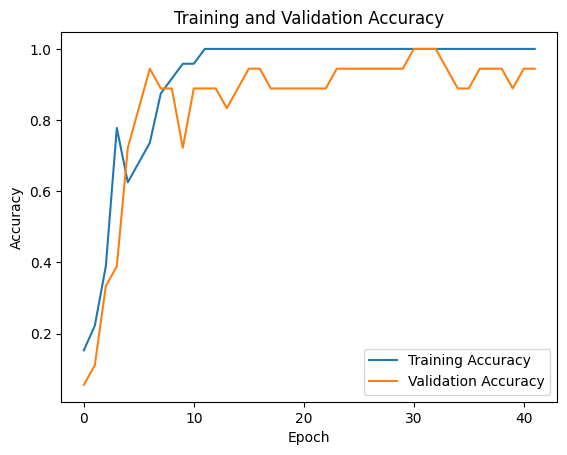

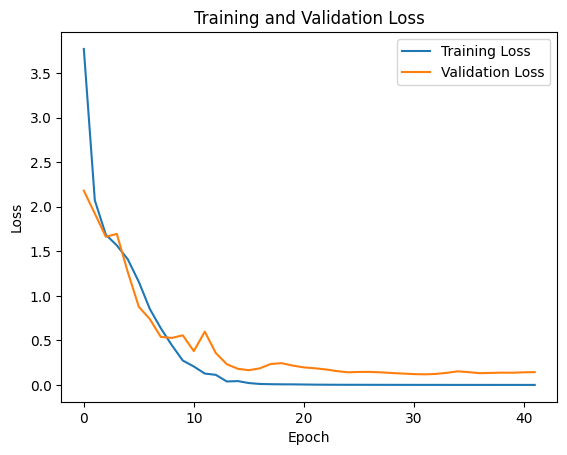

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()